### Introduction:
In This note book we will try to explore the key determinants of survival on Titanic through the following steps:
1. Load and cheack the data.
2. Feature engineering.
3. Explanatory Data analysis.
4. Model Training, Validation, and Prediction

### 1. Load and Check

In [1]:
# importing the required liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random as rnd

In [2]:
# Load The Data
df_train = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")

As you can see the provided data is splitted into two parts: training and test data. We will combine them together so that any feature engineering applies to both of them at once. After completing our explanatory data analysis and start model training, we will split them again.

In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dfs = [df_train, df_test] # to apply any change to both data frames

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The general information about the dataframe points out to several problems:
1. PassengerId is stored as Integer, where in fact it has no numeric meaning. So, it should be converted to an Object.
2. Categorical variables such as Sex and Embarked should be Integer not Float. But we will convert it latter before training using pd.get_dummies().
3. Age, Fare, Cabin, and Embarked have missing values.
4. The Name needs to be splitted into Title and Name
5. SibSp and Parch should to be combined into 1 variable (number of family members)

### 2. Feature Engineering

In [8]:
# Convering PassengerId to an object
for df in dfs:
    df["PassengerId"] = df["PassengerId"].astype("object")

In [9]:
# How many missing points in each variable
count_missing_train = df_train.isnull().sum()
percent_missing_train = round(df_train.isnull().sum()/len(df_train) * 100, 1)
missing_train = pd.concat([count_missing_train, percent_missing_train], axis = 1)
missing_train.columns = ["Missing (count)", "Missing (%)"]
missing_train

,Missing (count),Missing (%)
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [10]:
# How many missing points in each variable
count_missing_test = df_test.isnull().sum()
percent_missing_test = round(df_test.isnull().sum()/len(df_test) * 100, 1)
missing_test = pd.concat([count_missing_test, percent_missing_test], axis = 1)
missing_test.columns = ["Missing (count)", "Missing (%)"]
missing_test

,Missing (count),Missing (%)
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,86,20.6
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,1,0.2
Cabin,327,78.2


### How to deal with Missing Data?
There are many strategies to fill missing data:
1. Fill with the mean (better used in case of continous variables without outliers)
2. Fill with the median (better used in case of continous variables with outliers)
3. Fill with the mode (better used in case of categorical variables)
4. Drop the entire variable if the number of missing points is too large

Based on the above strategies:
1. Embarked: has just 2 missing values, se we will fill them with the mode (the most frequent data point)
2. Cabin: 77.1 percent of its values are missing, we will drop it entirly.
3. Age: Just 20 percent if the values are missing, we will fill these values with the mean of age given the values of other feature such as Sex, Ticket... etc.
4. In Test Data, Fill Fare with the mode. 

In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Fill Embarked and Fare Variables 
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [13]:
#  Drop Cabin
df_train = df_train.drop("Cabin", axis = 1)
df_test = df_test.drop("Cabin", axis = 1)

In [14]:
# fill Age. We will iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
guess_ages = np.zeros((2,3))
dfs = [df_train, df_test]
for df in dfs:
    df["Sex"] = df["Sex"].map({"male":1, "female":0}) #Do not Run This Cell Twice 
    for i in range(0, 2):
        for j in range(0,3):
            guess_df = df[(df["Sex"] == i)&(df["Pclass"] == j+1)]["Age"].dropna()
            
            age_guess = guess_df.mean()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0,3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]            
    
    df.Age = df.Age.astype(int)

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


### Done! Now It is all nice and clean
#### But still more feature engineering is required, we will create new variables as follows: 
1. Number of family members on board = 1 + SibSp + Parch
2. Title needs to be seprated from Name
3. Regrouping the Titles
4. Seprate pure numeric Tickets from Text-Numeric Tickets: It may say something about the income and thus the social class of the passenger.
5. Regrouping Ticket labels

In [17]:
for df in dfs:
    df["num_family"] = 1 + df.SibSp + df.Parch
    df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
    df["Title"] = df["Title"].replace(["Mlle", "Major", "Col", "Jonkheer", "Ms", "Lady", "the Countess", "Mme", "Sir", "Capt", "Don"], "Other")
    df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
    df["Ticket_Text"] = df["Ticket"].apply(lambda x: x.split(" ")[0].replace("/", "").replace(".", "").lower() if len(x.split(" ")) > 1 else 0)
    df["Ticket_Text"] = df["Ticket_Text"].replace(["swpp", "sotono2", "ppp", "fa", "casoton", "sop", "sp", "as", "sca4", "scow", "fc", "sc"], "other")
    df["Is_Alone"] = df["num_family"].apply(lambda x: 1 if x < 2 else 0)
    

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,num_family,Title,numeric_ticket,Ticket_Text,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S,2,Mr,0,a5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C,2,Mrs,0,pc,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S,1,Miss,0,stono2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S,2,Mrs,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S,1,Mr,1,0,1


To better understand the relationship between Survival and other Continious features such as Fare and Age, we need to convert the latter int catgorical features.

In [19]:
for df in dfs:
    df['Age_bins'] = pd.qcut(df['Age'], labels = ["<19", "19-23", "24-25", "26-31", "32-40", "41-80"], q = 6)
    

In [20]:
dfs = [df_train, df_test]

In [21]:
for df in dfs:
    df["Fare_bins"] = pd.qcut(df["Fare"], labels = ["<7", "7-8.5", "8.6-13", "14-25", "26-51", "52-512"], q = 6)

### 3. Explanatory Data analysis
In this section we will explore who had the highest probability of survival, during this process we will select the most relevant variables to feed the model with. 

In [22]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,num_family,numeric_ticket,Is_Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.239057,0.523008,0.381594,32.204208,1.904602,0.741863,0.602694
std,0.486592,0.836071,0.477990,13.286222,1.102743,0.806057,49.693429,1.613459,0.437855,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000


In [23]:
Fare_Sur = pd.pivot_table(data = df_train, index = "Fare_bins", values = "Survived").sort_values(by = "Survived", ascending = False) * 100
round(Fare_Sur, 1)

,Survived
Fare_bins,
52-512,69.8
14-25,43.6
26-51,41.8
8.6-13,36.7
<7,20.5
7-8.5,19.1


In [24]:
Age_Sur = pd.pivot_table(data = df_train, index = "Age_bins", values = "Survived").sort_values(by = "Survived", ascending = False) * 100
round(Age_Sur, 1)

,Survived
Age_bins,
<19,48.2
32-40,43.5
26-31,41.4
19-23,41.0
41-80,37.3
24-25,15.6


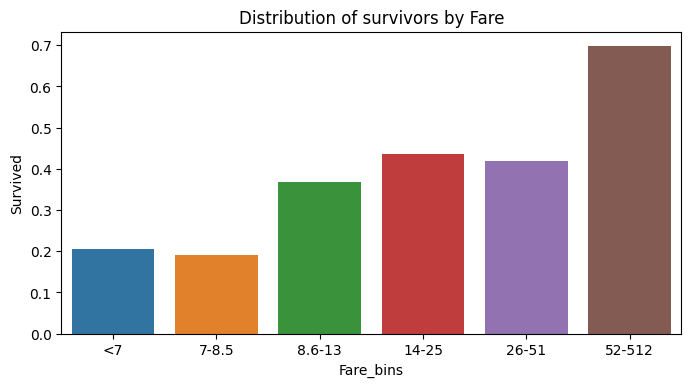

In [25]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "Fare_bins", y = "Survived", ci = None)
plt.title("Distribution of survivors by Fare")
plt.show()

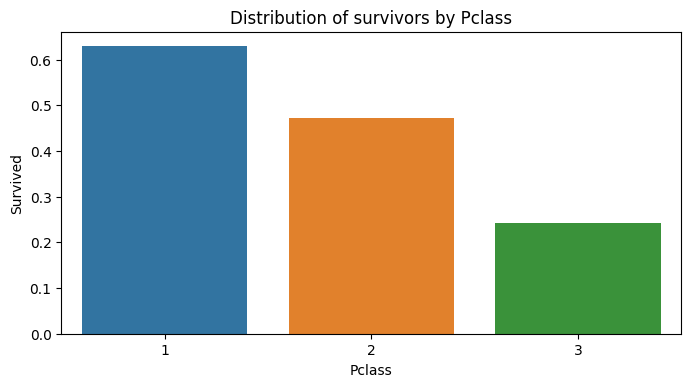

In [26]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "Pclass", y = "Survived", ci = None)
plt.title("Distribution of survivors by Pclass")
plt.show()

In [27]:
 df_train.groupby("Fare_bins").mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,num_family,numeric_ticket,Is_Alone
Fare_bins,,,,,,,,,,
<7,0.205128,2.884615,0.794872,28.025641,0.057692,0.025641,6.674201,1.083333,0.794872,0.935897
7-8.5,0.190789,3.000000,0.855263,26.815789,0.098684,0.032895,8.029107,1.131579,0.743421,0.927632
8.6-13,0.366906,2.381295,0.597122,29.251799,0.151079,0.129496,11.751770,1.280576,0.798561,0.791367
14-25,0.436242,2.563758,0.510067,26.093960,0.818792,0.597315,20.517505,2.416107,0.805369,0.221477
26-51,0.417808,1.739726,0.671233,31.458904,1.054795,0.924658,34.129679,2.979452,0.698630,0.445205
52-512,0.697987,1.234899,0.442953,33.939597,0.973154,0.597315,112.475251,2.570470,0.610738,0.281879


**Conclusion 1:** The more rich the passenger was, the more likely he survived.

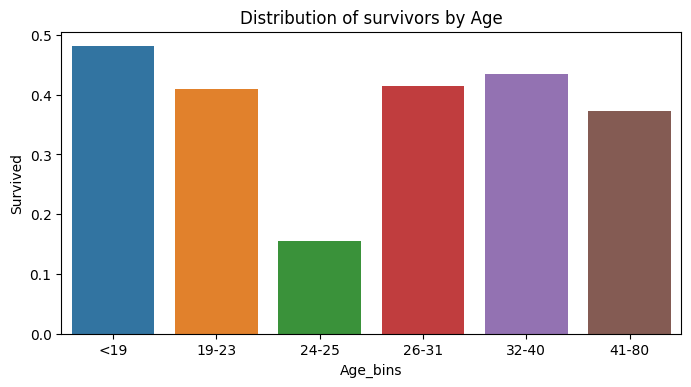

In [28]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "Age_bins", y = "Survived", ci = None)
plt.title("Distribution of survivors by Age")
plt.show()

**Age bins (execluding 24 - 25) have similar survival rate. We need to further invistigate this age band in specific.**

In [29]:
df_train.groupby("Age_bins").mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,num_family,numeric_ticket,Is_Alone
Age_bins,,,,,,,,,,
<19,0.481707,2.530488,0.542683,11.945122,1.115854,0.823171,31.794741,2.939024,0.780488,0.329268
19-23,0.410256,2.621795,0.461538,22.141026,0.519231,0.320513,26.672489,1.839744,0.692308,0.666667
24-25,0.155556,2.859259,0.925926,25.829630,0.488889,0.162963,16.455924,1.651852,0.792593,0.748148
26-31,0.414286,2.292857,0.678571,29.464286,0.271429,0.157143,24.920027,1.428571,0.757143,0.707143
32-40,0.435065,1.837662,0.636364,36.987013,0.337662,0.422078,48.928514,1.759740,0.714286,0.603896
41-80,0.373239,1.711268,0.690141,51.626761,0.323944,0.323944,42.770132,1.647887,0.718310,0.605634


**Conclusion 2: from the previous tables we can cleary see why those aged 24 - 25 were the least likely to survive**
1. They were entirely males (93% of this age band were males)
2. They were the most disadvantaged (They paid the lowest Fare)
3. They had many siblings and other family members on board.

**Here are the possiblities:**
1. It seems that they sacrificed themselves to rescue other.
2. Being disadvanteged and poor, they are least probable to have had access to survival equipments such as life-jackets for example.
3. Analyzing the second table suggests that bieng rich is the most important determinant of survival

**From the previous tables, we noticed that those with numerical tickets were most likely to be youthful disadvanteged males with low odds of survival, lets invisitage it further**

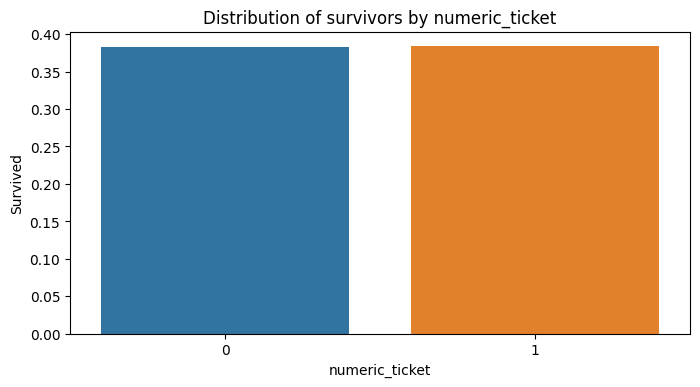

In [30]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "numeric_ticket", y = "Survived", ci = None)
plt.title("Distribution of survivors by numeric_ticket")
plt.show()

In [31]:
df_train.groupby("numeric_ticket").mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,num_family,Is_Alone
numeric_ticket,,,,,,,,,
0,0.382609,2.195652,0.673913,30.156522,0.673913,0.430435,46.784456,2.104348,0.600000
1,0.384266,2.347958,0.638427,28.919818,0.470499,0.364599,27.130899,1.835098,0.603631


In [32]:
Tic_Sur = round(pd.pivot_table(data = df_train, index = "Ticket_Text", values = "Survived").sort_values(by = "Survived", ascending = False) * 100, 0)
Fare_Sur = round(pd.pivot_table(data = df_train, index = "Ticket_Text", values = "Fare"), 0)
Tic_Sur_count = df_train.Ticket_Text.value_counts()
Tic_Sur_count = pd.DataFrame(Tic_Sur_count)
Ticket_Text_Survival = pd.concat([Tic_Sur, Tic_Sur_count, Fare_Sur], axis = 1)
Ticket_Text_Survival.columns = ["% of Survivor", "N", "Mean Fare"]
Ticket_Text_Survival

,% of Survivor,N,Mean Fare
fcc,80.0,5,22.0
scah,67.0,3,22.0
pp,67.0,3,14.0
pc,65.0,60,122.0
stono2,50.0,6,11.0
scparis,45.0,11,27.0
stono,42.0,12,8.0
c,40.0,5,10.0
0,38.0,665,27.0
ca,34.0,41,31.0


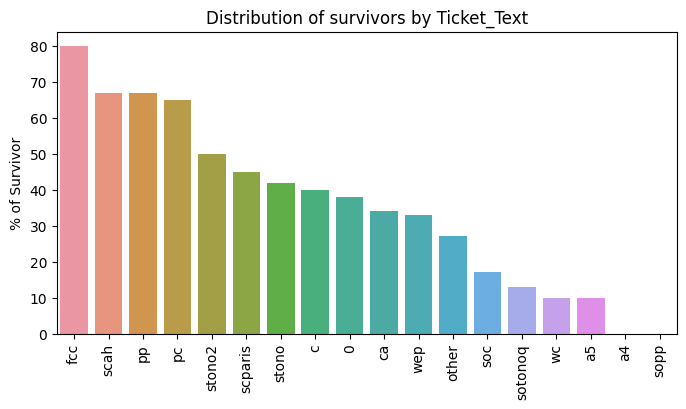

In [33]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = Ticket_Text_Survival, x = Ticket_Text_Survival.index, y = Ticket_Text_Survival["% of Survivor"], ci = None)
plt.title("Distribution of survivors by Ticket_Text")
plt.xticks(rotation = 90)
plt.show()

**Conclusion 3:** It turns out that our first impresion was somehow incorrect. Whether the ticket has text on it or not has no impact on survival. But it does have correlation with Fare and Age as we previously expected. Morover, when we look at the distribution of survivors by text wrote on each ticket we immediatly see a strong correlation.

**Now lets see if having family relatives on board affects survival**

In [34]:
df_train.Is_Alone.value_counts()

1    537
0    354
Name: Is_Alone, dtype: int64

- **537 passengers have no family relatives on board**

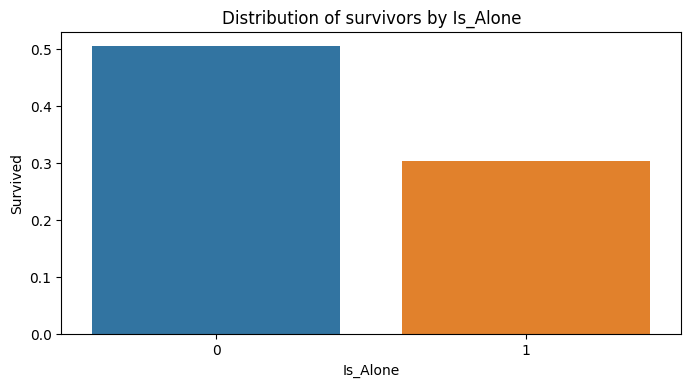

In [35]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "Is_Alone", y = "Survived", ci = None)
plt.title("Distribution of survivors by Is_Alone")
plt.show()

In [36]:
df_train.groupby("Is_Alone").mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,num_family,numeric_ticket
Is_Alone,,,,,,,,,
0,0.505650,2.169492,0.468927,26.274011,1.316384,0.960452,48.832275,3.276836,0.740113
1,0.303538,2.400372,0.765363,31.193669,0.000000,0.000000,21.242689,1.000000,0.743017


**Conclusion 4:** Unexpectedly, Those who are alone are less likely to survive compared to those who are not alone. This is might be due to the fact that they are older and less well-off.

**Lets now if males have higher survival rate than females?**

In [37]:
# Rename the sex variable to prevent any misconciption
df_train = df_train.rename(columns = {"Sex": "Is_Male"})
df_test = df_test.rename(columns = {"Sex": "Is_Male"})

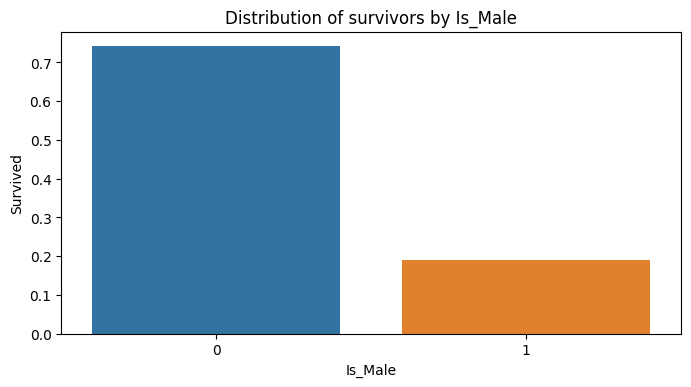

In [38]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = "Is_Male", y = "Survived", ci = None)
plt.title("Distribution of survivors by Is_Male")
plt.show()

In [39]:
df_train.groupby("Is_Male").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,num_family,numeric_ticket,Is_Alone
Is_Male,,,,,,,,,
0,0.742038,2.159236,27.289809,0.694268,0.649682,44.479818,2.343949,0.761146,0.401274
1,0.188908,2.389948,30.299827,0.429809,0.235702,25.523893,1.665511,0.731369,0.712305


In [40]:
pd.pivot_table(data = df_train, index = ["Is_Male", "Pclass"], values =["Survived", "Age", "Fare", "Is_Alone"])

Age        Fare  Is_Alone  Survived
Is_Male Pclass                                           
0       1       34.553191  106.125798  0.361702  0.968085
        2       28.697368   21.970121  0.421053  0.921053
        3       21.805556   16.118810  0.416667  0.500000
1       1       41.221311   67.226127  0.614754  0.368852
        2       30.648148   19.741782  0.666667  0.157407
        3       26.351585   12.661633  0.760807  0.135447

In [41]:
pd.pivot_table(data = df_train, index = ["Is_Male", "Pclass"], values = "Survived", columns = "Age_bins")

Age_bins             <19     19-23     24-25     26-31     32-40     41-80
Is_Male Pclass                                                            
0       1       0.928571  1.000000  0.500000  1.000000  1.000000  0.960000
        2       1.000000  0.909091  0.666667  0.947368  0.933333  0.833333
        3       0.533333  0.566667  0.400000  0.411765  0.400000  0.142857
1       1       0.571429  0.200000  1.000000  0.466667  0.380952  0.280000
        2       0.526316  0.000000  0.000000  0.125000  0.055556  0.095238
        3       0.190476  0.109091  0.112069  0.270833  0.026316  0.074074

**Conclusion 5:** Regardless to the Ticket Class and Age, Females have higher rates of survival than males.

**Lets now explore the impact of Titles no Survival**

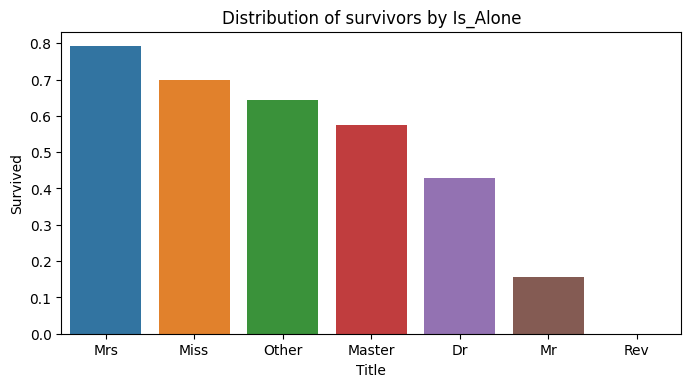

In [42]:
Tit_Sur = pd.pivot_table(data = df_train, index = "Title", values = "Survived").sort_values(by = "Survived", ascending = False)
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(data = df_train, x = Tit_Sur.index, y = Tit_Sur.Survived, ci = None)
plt.title("Distribution of survivors by Is_Alone")
plt.show()

In [43]:
pd.pivot_table(data = df_train, index = "Title", values = ["Survived", "Age", "Fare", "Is_Alone"]).sort_values("Survived", ascending = False)

,Age,Fare,Is_Alone,Survived
Title,,,,
Mrs,34.776000,45.138533,0.160000,0.792000
Miss,21.934066,43.797873,0.549451,0.697802
Other,42.214286,42.996729,0.785714,0.642857
Master,6.625000,34.703125,0.000000,0.575000
Dr,41.857143,49.168457,0.714286,0.428571
Mr,31.537718,24.441560,0.767892,0.156673
Rev,43.166667,18.312500,0.666667,0.000000


**Conclusion 6:** Regardless to the Ticket Class and Age, Miss and Mrs have higher rates of survival than other titles.

### Lets now have have a look at the statistical distribution for each feature 

In [44]:
df_train.corr()

,Survived,Pclass,Is_Male,Age,SibSp,Parch,Fare,num_family,numeric_ticket,Is_Alone
Survived,1.000000,-0.338481,-0.543351,-0.065132,-0.035322,0.081629,0.257307,0.016639,0.001492,-0.203367
Pclass,-0.338481,1.000000,0.131900,-0.408012,0.083081,0.018443,-0.549500,0.065997,0.079763,0.135207
Is_Male,-0.543351,0.131900,1.000000,0.108290,-0.114631,-0.245489,-0.182333,-0.200988,-0.032507,0.303646
Age,-0.065132,-0.408012,0.108290,1.000000,-0.250191,-0.179016,0.119313,-0.260430,-0.040756,0.181296
SibSp,-0.035322,0.083081,-0.114631,-0.250191,1.000000,0.414838,0.159651,0.890712,-0.080768,-0.584471
Parch,0.081629,0.018443,-0.245489,-0.179016,0.414838,1.000000,0.216225,0.783111,-0.035762,-0.583398
Fare,0.257307,-0.549500,-0.182333,0.119313,0.159651,0.216225,1.000000,0.217138,-0.173170,-0.271832
num_family,0.016639,0.065997,-0.200988,-0.260430,0.890712,0.783111,0.217138,1.000000,-0.073068,-0.690922
numeric_ticket,0.001492,0.079763,-0.032507,-0.040756,-0.080768,-0.035762,-0.173170,-0.073068,1.000000,0.003247
Is_Alone,-0.203367,0.135207,0.303646,0.181296,-0.584471,-0.583398,-0.271832,-0.690922,0.003247,1.000000


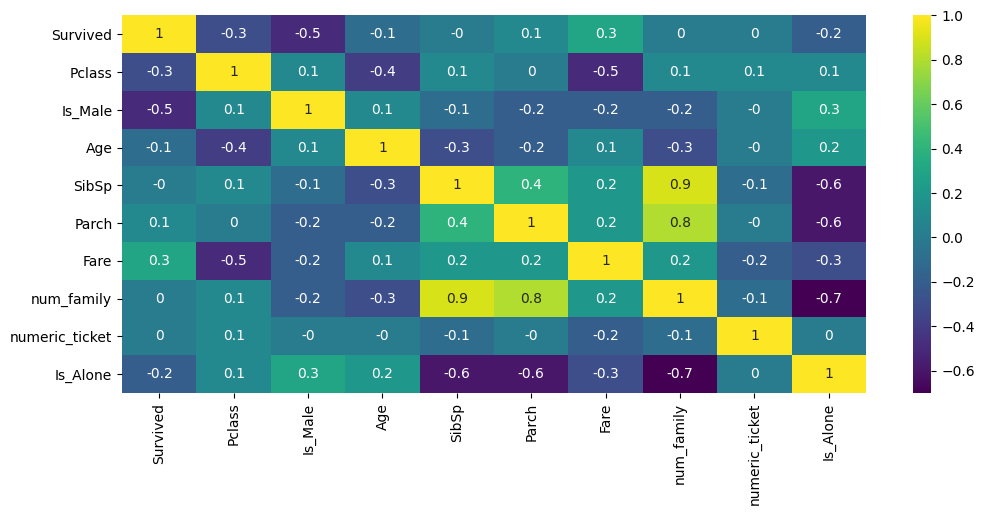

In [45]:
plt.figure(figsize = (12, 5), dpi = 100)
sns.heatmap(round(df_train.corr(), 1), annot = True, cmap = "viridis", annot_kws={"fontsize":10})
plt.show()

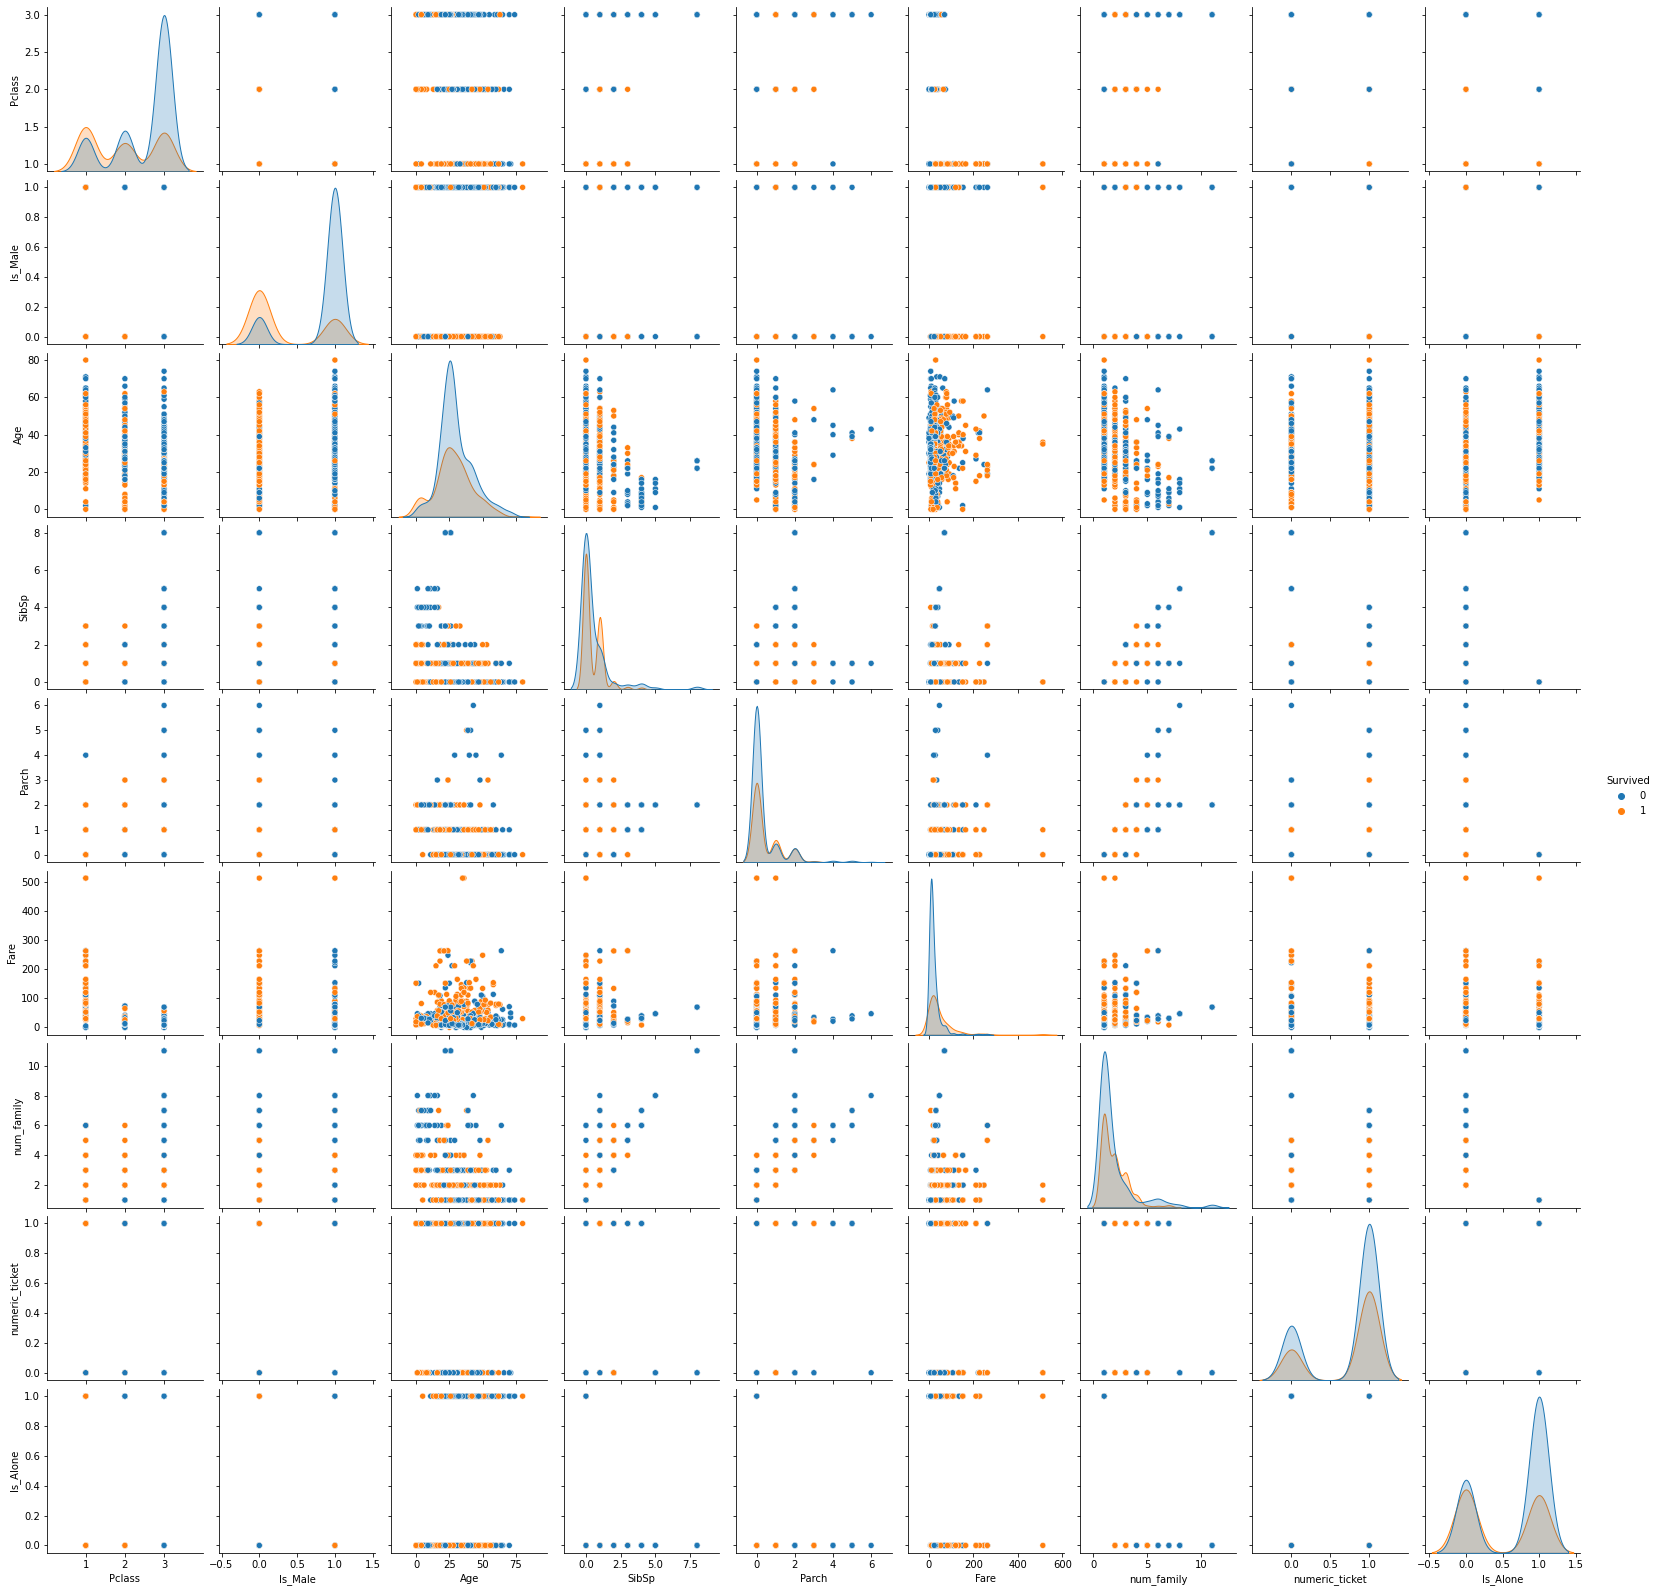

In [46]:
pairplot_data = df_train[['Survived', 'Pclass', 'Is_Male', 'Age', 'SibSp', 'Parch', 'Fare', 'num_family', 'numeric_ticket', 'Is_Alone']]
sns.pairplot(pairplot_data, diag_kind = "kde", hue = "Survived")
plt.show()

In [47]:
#cols = ['Pclass', 'Is_Male', 'Age', 'SibSp', 'Parch', 'Fare', 'num_family', 'numeric_ticket', 'Is_Alone']
#for col in cols:
    #plt.figure(figsize = (8, 4), dpi = 100)
    #sns.kdeplot(data = df_train, x= col, hue = "Survived")

### 4. Model Training, Validation, and Prediction

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Is_Male,Age,SibSp,Parch,Ticket,Fare,Embarked,num_family,Title,numeric_ticket,Ticket_Text,Is_Alone,Age_bins,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S,2,Mr,0,a5,0,19-23,<7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C,2,Mrs,0,pc,0,32-40,52-512
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S,1,Miss,0,stono2,1,24-25,7-8.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S,2,Mrs,1,0,0,32-40,52-512
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S,1,Mr,1,0,1,32-40,7-8.5


In [49]:
## dropping unnecessairy features for model training
df_train = df_train.drop(["Name", "Ticket", "Fare", "Age"], axis = 1)
df_test = df_test.drop(["Name", "Ticket", "Fare", "Age"], axis = 1)

In [50]:
# dropping repetitive features
df_train = df_train.drop(["SibSp", "Parch", "num_family"], axis = 1)
df_test = df_test.drop(["SibSp", "Parch", "num_family"], axis = 1)

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Is_Male,Embarked,Title,numeric_ticket,Ticket_Text,Is_Alone,Age_bins,Fare_bins
0,1,0,3,1,S,Mr,0,a5,0,19-23,<7
1,2,1,1,0,C,Mrs,0,pc,0,32-40,52-512
2,3,1,3,0,S,Miss,0,stono2,1,24-25,7-8.5
3,4,1,1,0,S,Mrs,1,0,0,32-40,52-512
4,5,0,3,1,S,Mr,1,0,1,32-40,7-8.5


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    object  
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Is_Male         891 non-null    int64   
 4   Embarked        891 non-null    object  
 5   Title           891 non-null    object  
 6   numeric_ticket  891 non-null    int64   
 7   Ticket_Text     891 non-null    object  
 8   Is_Alone        891 non-null    int64   
 9   Age_bins        891 non-null    category
 10  Fare_bins       891 non-null    category
dtypes: category(2), int64(5), object(4)
memory usage: 64.9+ KB


In [53]:
#Creating dummy varaibles
X = df_train.drop(["Survived", "PassengerId"], axis = 1)
X_dum = pd.get_dummies(X, drop_first = True)
df_test_dum = df_test.drop("PassengerId", axis = 1)
df_test_dum = pd.get_dummies(df_test, drop_first = True)
y = df_train["Survived"]

In [54]:
#Making Sure that training and test data sets have the same columns
Train_cols = X_dum.columns
test_cols = df_test_dum.columns 
for col in test_cols:
    if col not in Train_cols:
        df_test_dum = df_test_dum.drop(col, axis = 1)

IF you tried to complete the project without running the preceding cell, you will not be able to complete the upcoming model training parts. You will face an error indicating that the test data set do not have the same collumns as the training data set. The error resulted from wrangling the two data sets in seprate, some variables in the test set had categories that do not exist in the same variable in the training set.

In [55]:
#import cross validation 
from sklearn.model_selection import cross_val_score

In [56]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 2000)

#Model Training
log_reg.fit(X_dum, y)

#Prediction and validation
acc_score = round(log_reg.score(X_dum, y) * 100, 2)
acc_score

#cross validation
cv = cross_val_score(log_reg,X_dum,y,cv=5)
cv_mean = round(cv.mean() * 100, 2)

pd.DataFrame({"acc_score": [acc_score], "cv_score": [cv_mean]})

,acc_score,cv_score
0,83.73,81.26


In [57]:
#Support Vector Machine
from sklearn.svm import SVC
SVC = SVC()

#Model Training
SVC.fit(X_dum, y)

#Prediction and validation
acc_score = round(SVC.score(X_dum, y) * 100, 2)


#cross validation
cv = cross_val_score(SVC,X_dum,y,cv=5)
cv_mean = round(cv.mean() * 100, 2)

pd.DataFrame({"acc_score": [acc_score], "cv_score": [cv_mean]})

,acc_score,cv_score
0,84.4,80.92


In [58]:
#Descision Tree 
from sklearn import tree
dt = tree.DecisionTreeClassifier()

#Model Training
dt.fit(X_dum, y)

#Prediction and validation
acc_score = round(dt.score(X_dum, y) * 100, 2)


#cross validation
cv = cross_val_score(dt,X_dum,y,cv=5)
cv_mean = round(cv.mean() * 100, 2)

pd.DataFrame({"acc_score": [acc_score], "cv_score": [cv_mean]})

,acc_score,cv_score
0,91.25,78.79


In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()

#Model Training
rs.fit(X_dum, y)

#Prediction and validation
acc_score = round(rs.score(X_dum, y) * 100, 2)

#cross validation
cv = cross_val_score(rs,X_dum,y,cv=5)
cv_mean = round(cv.mean() * 100, 2)

pd.DataFrame({"acc_score": [acc_score], "cv_score": [cv_mean]})

,acc_score,cv_score
0,91.25,81.14


In [60]:
#XGB
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()

#Model Training
xgb.fit(X_dum, y)

#Prediction and validation
acc_score = round(xgb.score(X_dum, y) * 100, 2)


#cross validation
cv = cross_val_score(xgb,X_dum,y,cv=5)
cv_mean = round(cv.mean() * 100, 2)

pd.DataFrame({"acc_score": [acc_score], "cv_score": [cv_mean]})

,acc_score,cv_score
0,85.97,80.36


### Hyper Parameter Tunning
Lets now do some hyper parameter tunning to improve model results.

#### 1. Logestic Regression

In [61]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(max_iter = 2000)

# param_grid
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 50),
              'solver' : ['liblinear']}

# grid_model: Logestic Regression
lr_tuned = GridSearchCV(log_reg, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_lr = lr_tuned.fit(X_dum, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lr_tuned.best_params_))
print("Best score is {}".format(lr_tuned.best_score_ * 100))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Decision Tree Parameters: {'C': 2.559547922699533, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 81.59500345238844


#### 2. Random Forest Classifier

In [62]:
rs = RandomForestClassifier()

# param_grid
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

# grid_model: Logestic Regression
rs_tuned = GridSearchCV(rs, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rs = rs_tuned.fit(X_dum, y)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rs_tuned.best_params_))
print("Best score is {}".format(rs_tuned.best_score_ * 100))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 500}
Best score is 81.47950536689474


In [63]:
#Prediction and submission
y_predict = best_lr.predict(df_test_dum)

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_predict})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
#Submission
filename = 'Titanic_Predictions_2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Predictions_2.csv
